# Ham and Spam E-mail Classifier

# 1. Data Preprocessing

## 1.1. Imports

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import median
from numpy import var
from scipy.stats import pearsonr
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,zero_one_loss, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [148]:
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 1.2. DataSet Read
Read data from initial dataset

In [149]:
df = pd.read_csv("spambase/spambase.data", header=None)

In [150]:
# Get the labels of all examples
y = df[57]

# Convert data to numpy array
df_np = df.to_numpy()

## 1.3. Dataset Display
### 1.3.1. Histogram of samples distribution

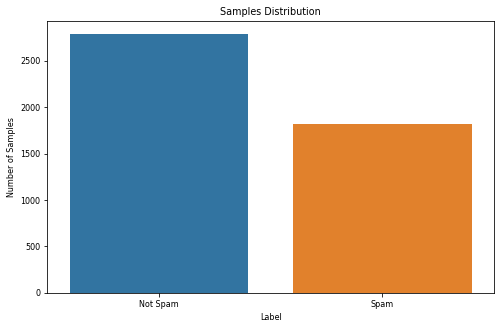

In [151]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y)
plt.xlabel("Label")
ax.set_xticklabels(['Not Spam', 'Spam'])
plt.ylabel("Number of Samples")
plt.title("Samples Distribution")
plt.show()


### 1.3.2. Box plots of features

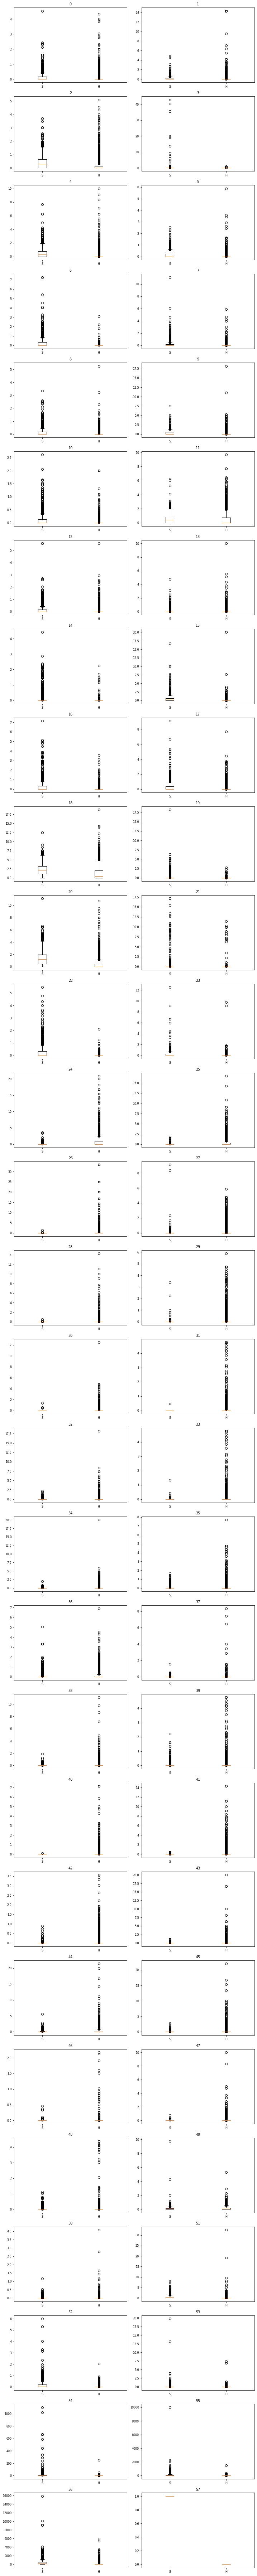

In [152]:
dfS=df[df[57] ==1]  # Spam examples
dfH=df[df[57] ==0]  # Not Spam examples

#Creating the window with 58 subplots.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=29, ncols=2, figsize=(10,100))
axes = axes.ravel()
#BOXPLOTS
for idx,ax in enumerate(axes):
    ax.figure
    data_to_plot = [dfS[idx],dfH[idx]]
    ax.boxplot(data_to_plot)
    ax.set_xticklabels(['S', 'H'])
    ax.set_title(idx)
plt.tight_layout()
plt.show()    

### 1.3.3. Histograms for all features

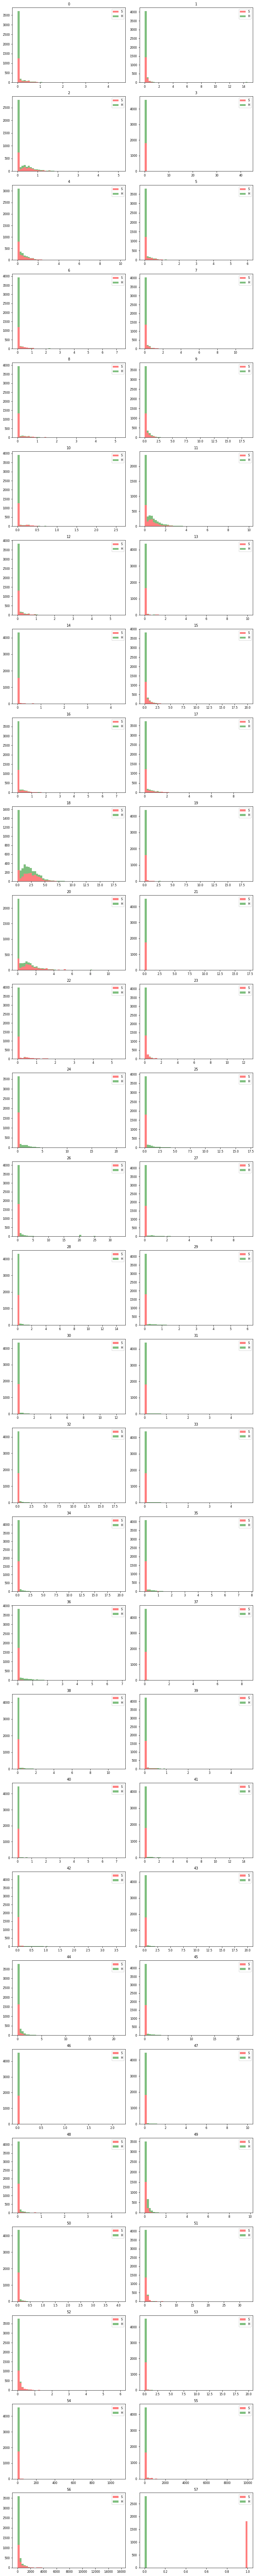

In [153]:
dfS=df[df[57] ==1]  # Spam examples
dfH=df[df[57] ==0]  # Not Spam examples

#Creating the window with 10 subplots.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=29, ncols=2, figsize=(10,100))
axes = axes.ravel()
#Creating histograms with 50 bins
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[idx]) - min(df[idx]))/50
    ax.hist([dfS[idx],dfH[idx]], bins=np.arange(min(df[idx]), max(df[idx]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['S','H'],color=['r','g']) #remove density=True to remove probs in y axis
    ax.legend(loc='upper right')
    ax.set_title(idx)
plt.tight_layout()
plt.show()

### 1.3.4. Scatter matrix of the top 10 features

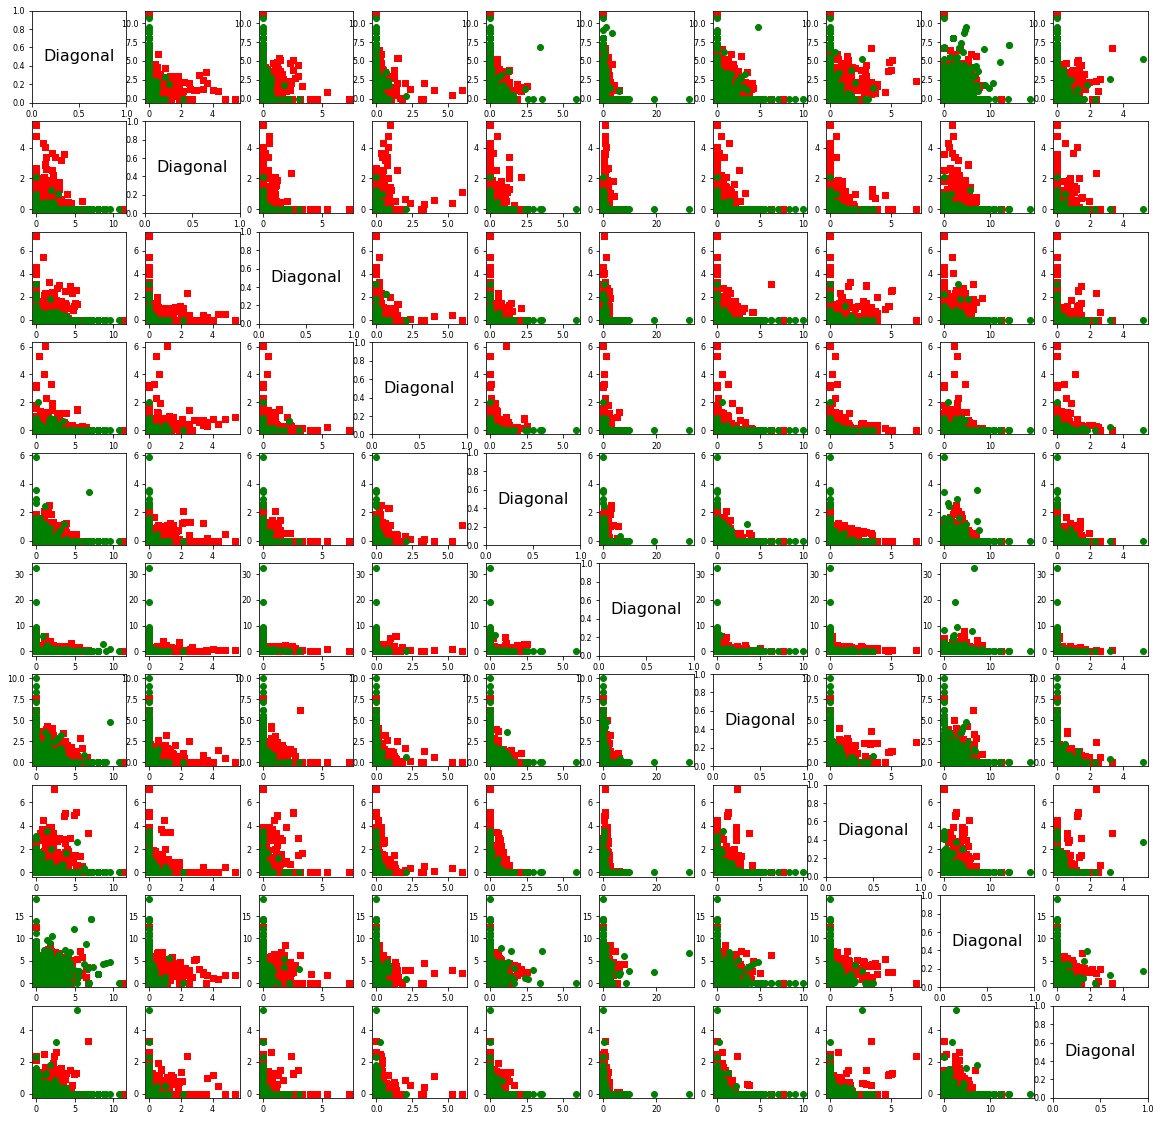

In [154]:
dfS=df[df[57] ==1]  # Spam examples
dfH=df[df[57] ==0]  # Not Spam examples

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20,20))

top_10_features = [20, 22, 6, 52, 5, 51, 4, 16, 18, 8]

for i in range(10):
    for j in range(10):
        ax = axes[i,j]
        ax.figure
        if i == j:
            ax.text(0.5, 0.5, "Diagonal", transform=ax.transAxes,
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=16)
        else:
            ax.scatter(dfS[top_10_features[j]],dfS[top_10_features[i]],marker='s',color='r',label='S')
            ax.scatter(dfH[top_10_features[j]],dfH[top_10_features[i]],marker='o',color='g',label='H')    

plt.show()

### 1.3.5. Pearsons correlation values of pairs for all features 

In [155]:
# Matrix to store all pearsons correlations values
pearsons_correlations = np.empty([57, 57])

for i in range(0, df.shape[1]-1):
    for k in range(i+1, df.shape[1]-1):
        
        # Calculate Pearson's correlation between feature i and k
        corr, _ = pearsonr(df_np[:, i], df_np[:, k])
        
        # Store the value in matrix
        pearsons_correlations[i, k] = corr
        pearsons_correlations[k, i] = corr
        
        print("Pearsons correlation between {0} and {1}: {2}".format(i, k, corr))


Pearsons correlation between 0 and 1: -0.016759465965112526
Pearsons correlation between 0 and 2: 0.06562676741246644
Pearsons correlation between 0 and 3: 0.013273232168107524
Pearsons correlation between 0 and 4: 0.023118630601867165
Pearsons correlation between 0 and 5: 0.05967433812016053
Pearsons correlation between 0 and 6: 0.007668553072690656
Pearsons correlation between 0 and 7: -0.003949886838921879
Pearsons correlation between 0 and 8: 0.106262978895582
Pearsons correlation between 0 and 9: 0.04119770210863794
Pearsons correlation between 0 and 10: 0.1884586382769463
Pearsons correlation between 0 and 11: 0.10580100402791734
Pearsons correlation between 0 and 12: 0.06643817776869967
Pearsons correlation between 0 and 13: 0.03678048907348532
Pearsons correlation between 0 and 14: 0.02843879479885183
Pearsons correlation between 0 and 15: 0.05938565344264984
Pearsons correlation between 0 and 16: 0.08192807076096431
Pearsons correlation between 0 and 17: 0.0533235331746644
Pea

Pearsons correlation between 28 and 45: -0.023577681619548655
Pearsons correlation between 28 and 46: -0.002312145250528642
Pearsons correlation between 28 and 47: -0.003302753445477834
Pearsons correlation between 28 and 48: -0.018502024615160297
Pearsons correlation between 28 and 49: 0.15859346299622454
Pearsons correlation between 28 and 50: 0.006574777306447748
Pearsons correlation between 28 and 51: -0.04232950874925654
Pearsons correlation between 28 and 52: -0.05023105366837152
Pearsons correlation between 28 and 53: 0.002076147451607143
Pearsons correlation between 28 and 54: -0.014936126593525011
Pearsons correlation between 28 and 55: -0.03473253720210011
Pearsons correlation between 28 and 56: -0.05662813561900601
Pearsons correlation between 29 and 30: 0.6072140718447692
Pearsons correlation between 29 and 31: 0.6602842578072619
Pearsons correlation between 29 and 32: -0.010434491092099521
Pearsons correlation between 29 and 33: 0.6579407332472766
Pearsons correlation betw

### 1.3.6. Pearsons correlation matrix of pairs for all features

(57, 57)


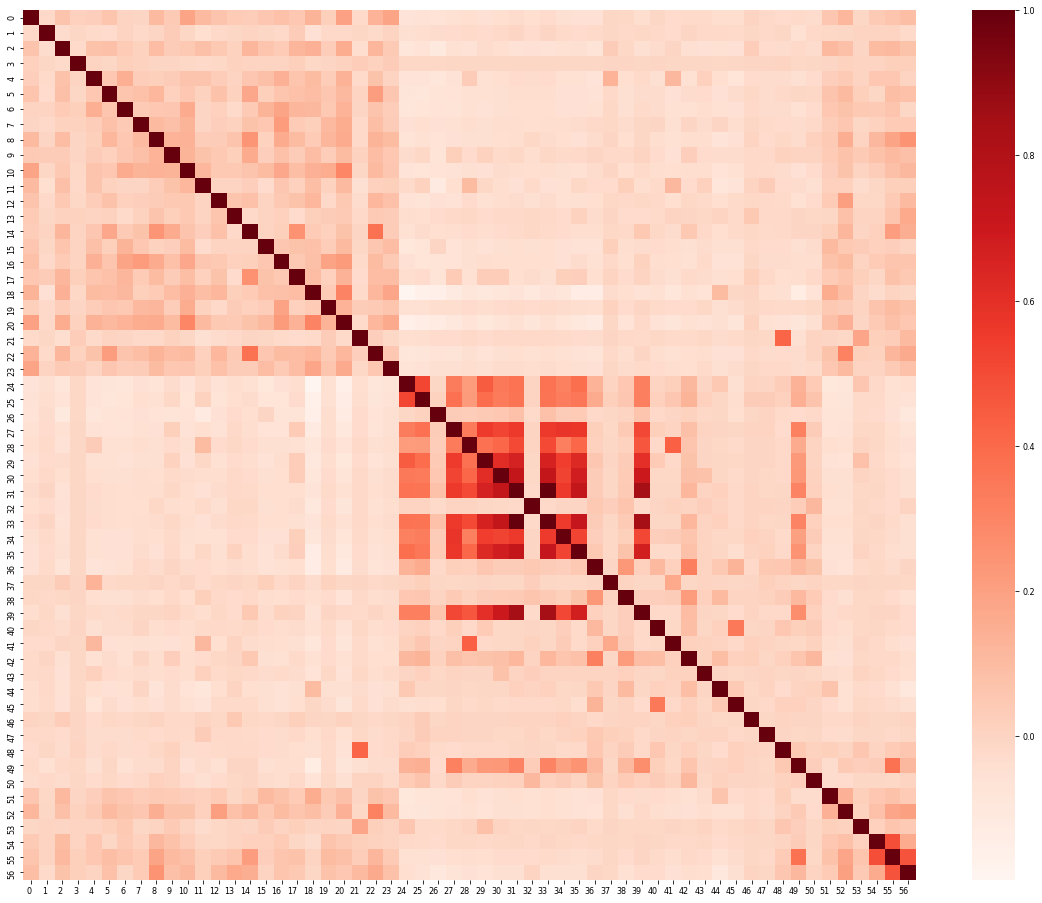

In [156]:
# Using numpy software.
corr = np.corrcoef(df_np[:, :-1].T)
print(corr.shape)

plt.figure(figsize=(20,16))

ax = sns.heatmap(corr, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right'
);
plt.show()

## 1.4. Split dataset in Training Set and Test Set

In [157]:
X = df_np[:,:57]  # Get a matrix with all examples without the label

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

# Split the data: 70% - training set; 30% - test set.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

## 1.5. Feature Selection
We will now perform feature selection based on the F-score value.
### 1.5.1. F-score calculation

In [158]:
from sklearn.feature_selection import SelectKBest, f_classif

N=57

k_bestfeatures = SelectKBest(score_func = f_classif)
rankings = k_bestfeatures.fit(X_train,y_train)
b=list(rankings.scores_)
a=list(range(0,len(b)))

sf = [g for _,g in sorted(zip(b,a))]
sf=sf[len(a)-N:len(a)]
c=1
sf=reversed(sf)
print(['order','index','f-score'])
inx=[]
for chosen in sf:
    print(str(c)+'º: ', chosen,'   ', b[chosen])
    c+=1
    inx.append(chosen)
print(inx)

['order', 'index', 'f-score']
1º:  20     544.3887090227299
2º:  22     440.11459687750545
3º:  6     415.6432449574295
4º:  51     382.3155478676589
5º:  52     344.24667209003496
6º:  15     276.5239415145726
7º:  18     259.9170338883358
8º:  16     239.2144623444769
9º:  24     228.47459927321026
10º:  56     224.15401572092347
11º:  4     200.2288016456496
12º:  25     198.08161945522681
13º:  8     189.31617910752914
14º:  10     182.07921293418025
15º:  5     170.91524603154713
16º:  23     164.5963719700226
17º:  7     151.45363758543704
18º:  17     139.00355639529286
19º:  2     136.1858407391426
20º:  55     129.27451154016734
21º:  14     119.1267328524042
22º:  26     117.27809195456747
23º:  19     110.57265503050208
24º:  36     108.75994903548217
25º:  29     99.00654531831853
26º:  27     80.95766688116714
27º:  45     78.28612331165712
28º:  34     66.54501773115688
29º:  44     64.52192556554616
30º:  35     58.61185038115032
31º:  28     57.85691272585952
32º:  12  

### 1.5.2. Pearsons correlation matrix - Reduction of features
After calculating the F-score we will remove one feature of the pairs of features that are very correlated. For that we will use the pearsons correlation matrix. The feature of the pair that is removed is the one that has a lower value of F-score. 
The threshold value we use to determine if a pair of features is very correlated is 0.8.

In [159]:
# Convert numpy to DataFrame
data_features = pd.DataFrame(X, dtype='float')

# Get correlation matrix
corr_matrix = data_features.corr().abs()

# Function to remove features
def remove_features(X_train, X_test, corr, threshold=0.8):
    # Select upper triangle of correlation matrix
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    to_drop = []
    for column in upper.columns:
        other_column = 0
        for correlation_value in upper[column]:
            
            # If the correlation value between the two features is greater than the threshold
            if correlation_value > threshold:
                # Remove the feature that has the lower F-score or the other one if it is already going to be removed
                if inx.index(column) > inx.index(upper.columns[other_column] and other_column not in to_drop):
                    inx.remove(column)
                    to_drop.append(upper.columns[other_column])
                else:
                    inx.remove(column)
                    to_drop.append(column)
                break
            other_column += 1
    print("Removed features: ", to_drop)
    return X_train.drop(X_train[to_drop], axis=1), X_test.drop(X_test[to_drop], axis=1), to_drop

X_train, X_test, removed_features = remove_features(pd.DataFrame(X_train, dtype='float'), pd.DataFrame(X_test, dtype='float'), corr_matrix)
print(X_train.head())

Removed features:  [33, 39]
     0     1     2    3     4     5    6     7    8     9   ...   47     48  \
0  0.00  0.00  0.00  0.0  0.40  0.40  0.4  0.40  0.0  0.00  ...  0.0  0.000   
1  0.04  0.14  0.29  0.0  0.04  0.04  0.0  0.09  0.0  0.19  ...  0.0  0.020   
2  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.0  0.00  ...  0.0  1.001   
3  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.0  0.00  ...  0.0  0.000   
4  0.38  0.00  1.16  0.0  0.00  0.00  0.0  0.00  0.0  0.00  ...  0.0  0.000   

     49     50     51   52   53     54     55      56  
0  0.00  0.000  0.124  0.0  0.0  1.940   12.0    97.0  
1  0.16  0.006  0.000  0.0  0.0  2.667  185.0  1763.0  
2  0.00  0.000  0.000  0.0  0.0  2.701   20.0   181.0  
3  0.00  0.000  0.000  0.0  0.0  2.333    5.0     7.0  
4  0.00  0.000  0.000  0.0  0.0  2.000   51.0   114.0  

[5 rows x 55 columns]


## 1.6. Feature Scaling
### 1.6.1. Normalization
Now we normalize all the dataset using a StandardScaler.

In [160]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(X_train.values)
X_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)

scaled_features = scaler.transform(X_test.values)
X_test = pd.DataFrame(scaled_features, index=X_test.index, columns=X_test.columns)

# 2. Train Model

In the section we will now train our models to study which parameters are better for each one. 
We will study the following classifiers:
 - SVM
 - Random Forest
 - Logistic Regression

## 2.1. SVM 

num features =  5

Degree  1  Max accuracy:  0.8763975155279503  C:  20

Degree  2  Max accuracy:  0.8251552795031056  C:  100

Degree  3  Max accuracy:  0.8767080745341616  C:  100


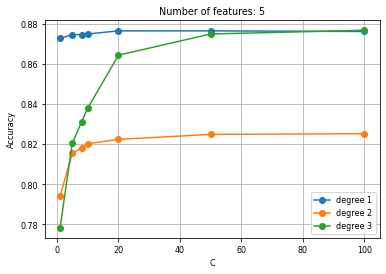

num features =  10

Degree  1  Max accuracy:  0.8984472049689441  C:  100

Degree  2  Max accuracy:  0.8708074534161492  C:  100

Degree  3  Max accuracy:  0.9040372670807453  C:  100


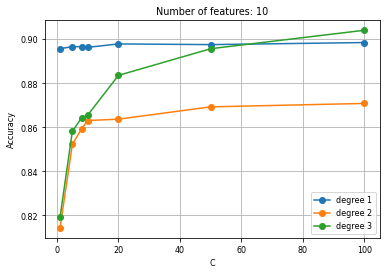

num features =  15

Degree  1  Max accuracy:  0.9018633540372671  C:  100

Degree  2  Max accuracy:  0.8857142857142857  C:  100

Degree  3  Max accuracy:  0.9046583850931678  C:  100


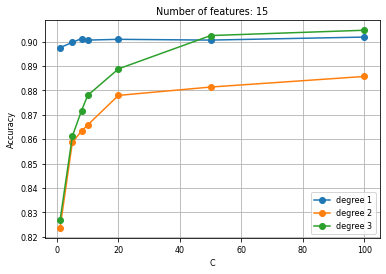

num features =  20

Degree  1  Max accuracy:  0.9052795031055901  C:  1

Degree  2  Max accuracy:  0.8804347826086958  C:  100

Degree  3  Max accuracy:  0.9003105590062112  C:  50


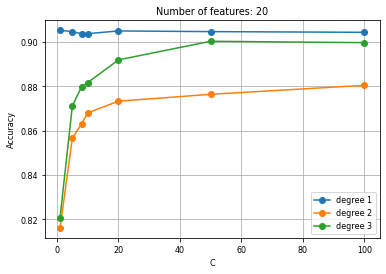

num features =  25

Degree  1  Max accuracy:  0.9139751552795031  C:  50

Degree  2  Max accuracy:  0.8909937888198758  C:  50

Degree  3  Max accuracy:  0.910248447204969  C:  100


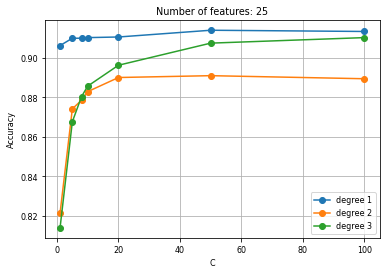

num features =  30

Degree  1  Max accuracy:  0.9251552795031055  C:  100

Degree  2  Max accuracy:  0.9065217391304348  C:  50

Degree  3  Max accuracy:  0.9099378881987576  C:  100


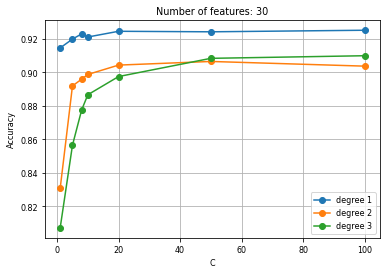

num features =  35

Degree  1  Max accuracy:  0.9267080745341616  C:  50

Degree  2  Max accuracy:  0.906832298136646  C:  20

Degree  3  Max accuracy:  0.9130434782608696  C:  100


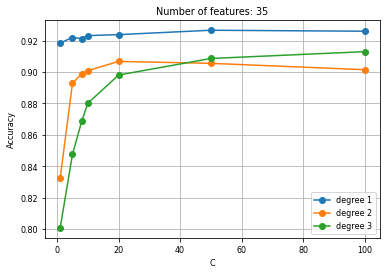

num features =  40

Degree  1  Max accuracy:  0.9260869565217391  C:  20

Degree  2  Max accuracy:  0.9065217391304348  C:  20

Degree  3  Max accuracy:  0.9127329192546584  C:  100


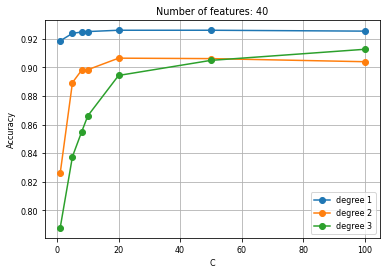

num features =  45

Degree  1  Max accuracy:  0.9279503105590061  C:  50

Degree  2  Max accuracy:  0.9093167701863354  C:  50

Degree  3  Max accuracy:  0.9118012422360248  C:  100


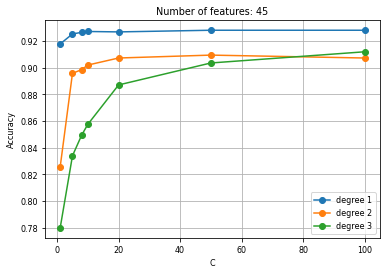

num features =  55

Degree  1  Max accuracy:  0.9276397515527951  C:  8

Degree  2  Max accuracy:  0.9111801242236024  C:  20

Degree  3  Max accuracy:  0.9077639751552795  C:  100


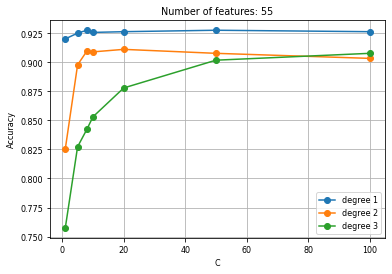

In [161]:
C_rgl = [1, 5, 8, 10, 20, 50, 100]
degrees = [1, 2, 3]
num_features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 55]

for f in num_features:
    X_train_new = X_train.loc[:, inx[:f]]
    X_test_new = X_test.loc[:, inx[:f]]
    print("num features = ", f)
    for degree in degrees:
        print("")
        accuracies = []
        #print("{:^7s} {:^6s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("Degree", "C", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
        for i in C_rgl:
            clf = SVC(kernel='poly', C=i, degree=degree)
            scores = cross_val_score(clf, X_train_new, y_train, cv=4, scoring="accuracy")
            #if degree == 3:
            accuracies.append(scores.mean())
            
            """
            clf = SVC(kernel='poly', C=i, degree=degree)
            clf.fit(X_train_new, y_train)
            y_predict = clf.predict(X_test_new)
            statistics = precision_recall_fscore_support(y_test, y_predict)
            
            accuracy = accuracy_score(y_test, y_predict)*100
            precision = precision_score(y_test, y_predict)
            recall = (statistics[1][0] + statistics[1][1]) / 2
            f1score = (statistics[2][0] + statistics[2][1]) / 2
            roc_area = roc_auc_score(y_test, y_predict)
            sensitivity = statistics[1][1]
            specificity = statistics[1][0]
            
            print("{:^7.2f} {:^6.2f} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
            .format(degree, i, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))
            """
        
        print("Degree ", degree, " Max accuracy: " , np.max(accuracies), " C: ", C_rgl[np.argmax(accuracies)] )
        plt.plot(C_rgl, accuracies, marker="o" ,label=f"degree {degree}")
    plt.legend()
    plt.xlabel("C")
    plt.ylabel("Accuracy")
    plt.title(f"Number of features: {str(f)}") 
    plt.grid()
    plt.show()
     


## 2.2. Random Forest

Number of estimators  2000  Max accuracy:  0.8829192546583852


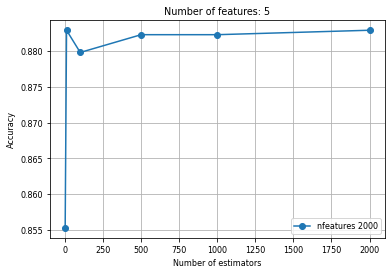

Number of estimators  100  Max accuracy:  0.9279503105590062


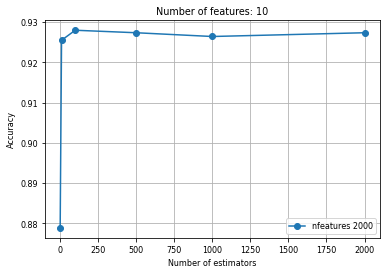

Number of estimators  2000  Max accuracy:  0.9316770186335404


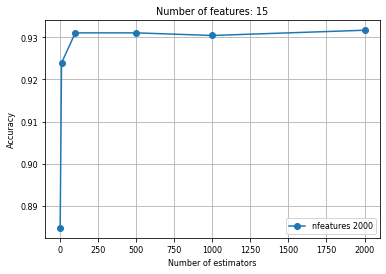

Number of estimators  100  Max accuracy:  0.9397515527950311


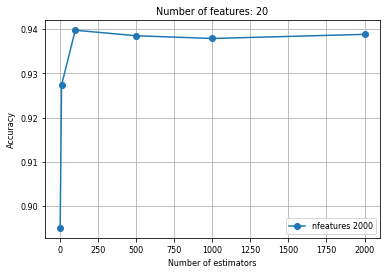

Number of estimators  100  Max accuracy:  0.9419254658385094


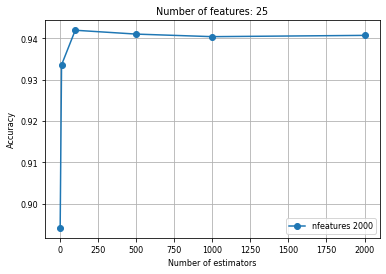

Number of estimators  2000  Max accuracy:  0.9490683229813663


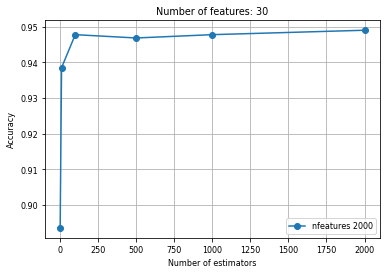

Number of estimators  1000  Max accuracy:  0.95


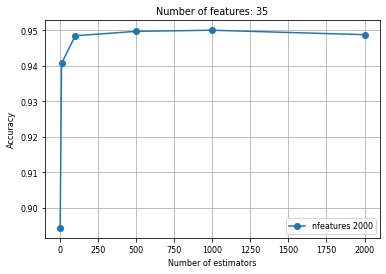

Number of estimators  100  Max accuracy:  0.9459627329192547


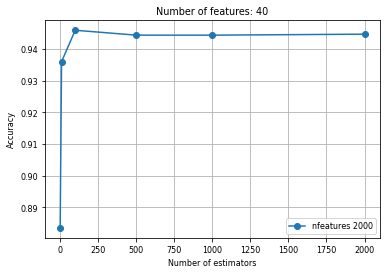

Number of estimators  100  Max accuracy:  0.9468944099378882


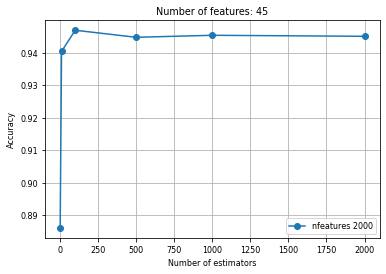

Number of estimators  100  Max accuracy:  0.946583850931677


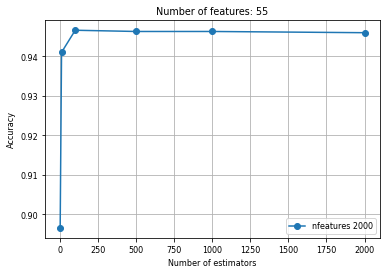

In [162]:
number_of_estimators = [1, 10, 100, 500, 1000, 2000]
num_features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 55]

for f in num_features:
    X_train_new = X_train.loc[:, inx[:f]]
    X_test_new = X_test.loc[:, inx[:f]]
    accuracies = []
    #print("{:^12s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("nEstimators", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
    for i in number_of_estimators:
        clf = RandomForestClassifier(n_estimators = i, random_state = 1) 
        
        scores = cross_val_score(clf, X_train_new, y_train, cv=4, scoring="accuracy")
        accuracies.append(scores.mean())
        
        """
        clf = RandomForestClassifier(n_estimators = i, random_state = 1) 
        clf.fit(X_train_new, y_train)
        
        y_predict = clf.predict(X_test_new)
        statistics = precision_recall_fscore_support(y_test, y_predict)
            
        accuracy = accuracy_score(y_test, y_predict)*100
        precision = precision_score(y_test, y_predict)
        recall = (statistics[1][0] + statistics[1][1]) / 2
        f1score = (statistics[2][0] + statistics[2][1]) / 2
        roc_area = roc_auc_score(y_test, y_predict)
        sensitivity = statistics[1][1]
        specificity = statistics[1][0]
        
        print("{:^12d} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
            .format(i, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))
        """  
        
    print("Number of estimators ", number_of_estimators[np.argmax(accuracies)], " Max accuracy: " , np.max(accuracies) )
        
    plt.plot(number_of_estimators, accuracies, marker="o" ,label=f"nfeatures {i}")
    
    plt.legend()
    plt.xlabel("Number of estimators")
    plt.ylabel("Accuracy")
    plt.title(f"Number of features: {str(f)}") 
    plt.grid()
    plt.show()

## 2.3. Logistic Regression

C:  10  Max accuracy:  0.867080745341615


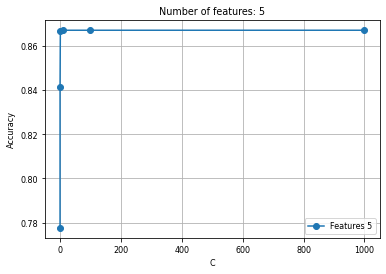

C:  100  Max accuracy:  0.8888198757763974


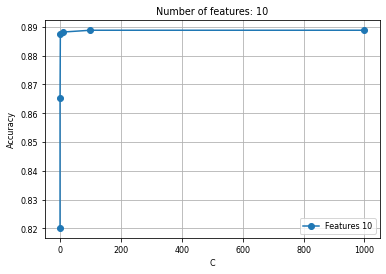

C:  1  Max accuracy:  0.896583850931677


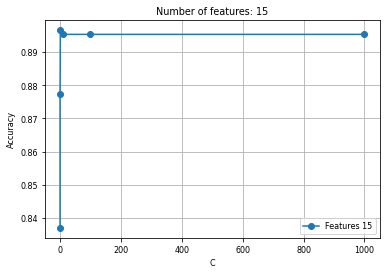

C:  1000  Max accuracy:  0.9021739130434783


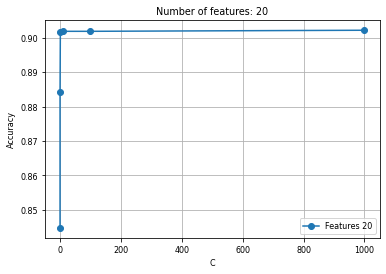

C:  1000  Max accuracy:  0.9114906832298136


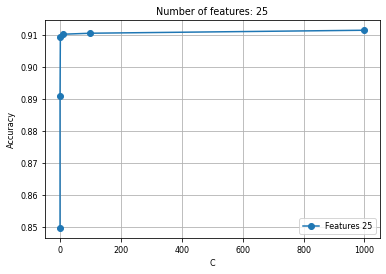

C:  10  Max accuracy:  0.9226708074534161


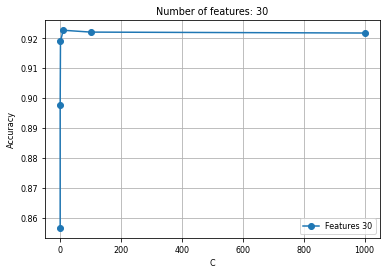

C:  100  Max accuracy:  0.9245341614906831


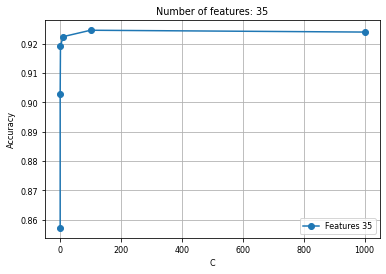

C:  100  Max accuracy:  0.924223602484472


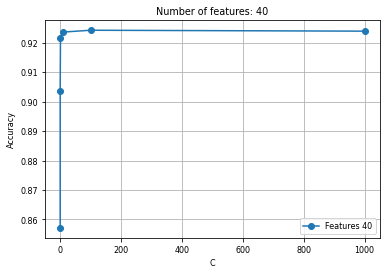

C:  1  Max accuracy:  0.9251552795031056


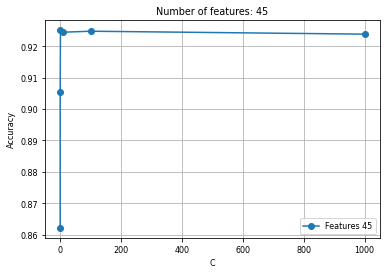

C:  1  Max accuracy:  0.9270186335403726


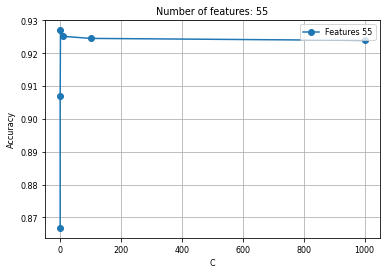

In [163]:
C_rgl = [0.001, 0.01, 1, 10, 100, 1000]
num_features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 55]

for f in num_features:
    X_train_new = X_train.loc[:, inx[:f]]
    X_test_new = X_test.loc[:, inx[:f]]
    
    #print("num features = ", f)
    #print("")
    accuracies = []
    #print("{:^10s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("C", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
    for i in C_rgl:
        clf = LogisticRegression(C=i, max_iter=1000)
        scores = cross_val_score(clf, X_train_new, y_train, cv=4, scoring="accuracy")
        accuracies.append(scores.mean())
        
        """
        clf = LogisticRegression(C=i, max_iter=1000)
        clf.fit(X_train_new, y_train)
        y_predict = clf.predict(X_test_new)
        statistics = precision_recall_fscore_support(y_test, y_predict)

        accuracy = accuracy_score(y_test, y_predict)*100
        precision = precision_score(y_test, y_predict)
        recall = (statistics[1][0] + statistics[1][1]) / 2
        f1score = (statistics[2][0] + statistics[2][1]) / 2
        roc_area = roc_auc_score(y_test, y_predict)
        sensitivity = statistics[1][1]
        specificity = statistics[1][0]

        print("{:^10.2f} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
            .format(i, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))
        """
    print("C: ", C_rgl[np.argmax(accuracies)], " Max accuracy: ", np.max(accuracies))
        
    plt.plot(C_rgl, accuracies, marker="o" ,label=f"Features {f}")
    
    plt.legend()
    plt.xlabel("C")
    plt.ylabel("Accuracy")
    plt.title(f"Number of features: {str(f)}") 
    plt.grid()
    plt.show()

# 3. Test Model
Analyzing the results obtained in the previous section, we will now choose the best parameters to test the performance of our models using the test set.

Auxiliar function to compute statistical metrics in order to evaluate the performance of the classifier.

In [164]:
def get_evaluation_metrics(y_test, y_predict):
    statistics = precision_recall_fscore_support(y_test, y_predict)

    accuracy = accuracy_score(y_test, y_predict)*100
    precision = precision_score(y_test, y_predict)
    recall = (statistics[1][0] + statistics[1][1]) / 2
    f1score = (statistics[2][0] + statistics[2][1]) / 2
    roc_area = roc_auc_score(y_test, y_predict)
    sensitivity = statistics[1][1]
    specificity = statistics[1][0]
    
    return accuracy, precision, recall, f1score, roc_area, sensitivity, specificity

In [183]:
def conf_matrix(real_values, predicted_values):
    # Create confusion matrix
    matrix = confusion_matrix(real_values, predicted_values, normalize='true')
    # Plot confusion matrix
    sns.heatmap(matrix, annot=True, cmap=plt.cm.Reds, xticklabels=["spam", "ham"], yticklabels=["spam", "ham"])
    plt.show()

## 3.1. SVM

SVM
Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 1.00   1000.00   91.24      0.91       0.90        0.91       0.90        0.85          0.95     


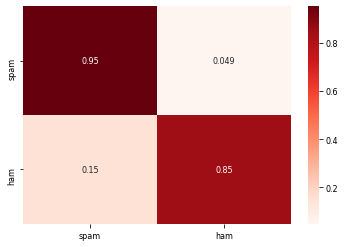

In [184]:
# Parameters of the best model obtained when training the model with diferent parameters
number_of_features = 25
C = 100
degree = 1

# Create a matrix for the data to train and to test with only the top number_of_features
X_train_new = X_train.loc[:, inx[:number_of_features]]
X_test_new = X_test.loc[:, inx[:number_of_features]]

# Create the model
clf = SVC(kernel='poly', C=C, degree=degree)
# Train the model using the training set
clf.fit(X_train_new, y_train)
# Predict the model for the test set
y_predict = clf.predict(X_test_new)

# Calculate metrics to evaluate the model
accuracy, precision, recall, f1score, roc_area, sensitivity, specificity = get_evaluation_metrics(y_test, y_predict)

print("SVM")
print("{:^7s} {:^6s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("Degree", "C", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
print("{:^7.2f} {:^6.2f} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
.format(degree, i, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))

conf_matrix(y_test, y_predict)

## 3.2. Random Forest

Random Forest
nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
    1000       94.71      0.94       0.94        0.94       0.94        0.92          0.97     


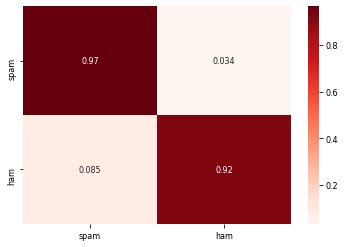

In [185]:
# Parameters of the best model obtained when training the model with diferent parameters
number_of_features = 35
n_estimators = 1000

# Create a matrix for the data to train and to test with only the top number_of_features
X_test_new = X_test.loc[:, inx[:number_of_features]]
X_train_new = X_train.loc[:, inx[:number_of_features]]

# Create the model
clf = RandomForestClassifier(n_estimators = n_estimators, random_state = 1) 
# Train the model using the training set
clf.fit(X_train_new, y_train)
# Predict the model for the test set
y_predict = clf.predict(X_test_new)

# Calculate metrics to evaluate the model
accuracy, precision, recall, f1score, roc_area, sensitivity, specificity = get_evaluation_metrics(y_test, y_predict)

print("Random Forest")
print("{:^12s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("nEstimators", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
print("{:^12d} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
    .format(n_estimators, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))
        
conf_matrix(y_test, y_predict)

## 3.3 Logistic Regression

Logistic Regression
    C      Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
  100.00     91.53      0.92       0.90        0.91       0.90        0.85          0.95     


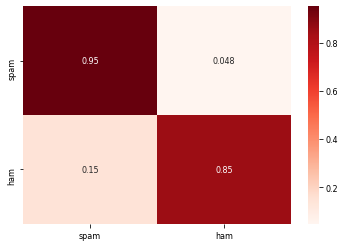

In [186]:
# Parameters of the best model obtained when training the model with diferent parameters
number_of_features = 30
C = 100

# Create a matrix for the data to train and to test with only the top number_of_features
X_test_new = X_test.loc[:, inx[:number_of_features]]
X_train_new = X_train.loc[:, inx[:number_of_features]]

# Create the model
clf = LogisticRegression(C=C, max_iter=1000)
# Train the model using the training set
clf.fit(X_train_new, y_train)
# Predict the model for the test set
y_predict = clf.predict(X_test_new)

# Calculate metrics to evaluate the model
accuracy, precision, recall, f1score, roc_area, sensitivity, specificity = get_evaluation_metrics(y_test, y_predict)

print("Logistic Regression")
print("{:^10s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("C", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
print("{:^10.2f} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
    .format(C, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))

conf_matrix(y_test, y_predict)

# 4. Test with Enron Dataset
In this section we will test our three classifiers using a diferent dataset.

## 4.1. Read the data

In [191]:
enron_df = pd.read_csv("Enron/enron_dataset.csv", header=None)

enron_X_test = enron_df.loc[:, :56]
print(enron_x_test.shape)
enron_y_test = enron_df[57]

(1500, 57)


## 4.2. Remove features that were removed in feature selection

In [192]:
enron_X_test = enron_X_test.drop(enron_X_test[removed_features], axis=1)
print("Removed Features: ", removed_features)

Removed Features:  [33, 39]


## 4.3. Scale the data using the StandardScaler created when training the data

In [193]:
scaled_features = scaler.transform(enron_X_test.values)
enron_X_test = pd.DataFrame(scaled_features, index=enron_X_test.index, columns=enron_X_test.columns)

## 4.4. SVM

In [194]:
# Parameters of the best model obtained when training the model with diferent parameters
C_rgl = [1, 5, 8, 10, 20, 50, 100]
degrees = [1, 2, 3]

num_features = [10,15,20,25,30,40, 55]

for n_feat in num_features:
    X_train_new = X_train.loc[:, inx[:n_feat]]
    enron_X_test_new = enron_X_test.loc[:, inx[:n_feat]]
    
    print("\nNumber of features: ", n_feat)
    for degree in degrees:
        print("{:^7s} {:^6s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("Degree", "C", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
        for c in C_rgl:
            clf = SVC(kernel='poly', C=c, degree=degree)
            clf.fit(X_train_new, y_train)
            y_predict = clf.predict(enron_X_test_new)
            
            accuracy, precision, recall, f1score, roc_area, sensitivity, specificity = get_evaluation_metrics(enron_y_test, y_predict)

            print("{:^7.2f} {:^6.2f} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
                        .format(degree, c, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))


Number of features:  10
Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 1.00    1.00    68.67      0.86       0.71        0.67       0.71        0.65          0.77     
 1.00    5.00    67.93      0.86       0.70        0.67       0.70        0.64          0.77     
 1.00    8.00    67.20      0.86       0.70        0.66       0.70        0.62          0.78     
 1.00   10.00    66.87      0.86       0.70        0.66       0.70        0.62          0.78     
 1.00   20.00    67.40      0.86       0.70        0.66       0.70        0.63          0.78     
 1.00   50.00    67.07      0.86       0.70        0.66       0.70        0.62          0.78     
 1.00   100.00   67.13      0.86       0.70        0.66       0.70        0.62          0.78     
Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 2.00    1.00    54.20      0.86       0.63        0.54       0.63        0.40          0.85 

 2.00    8.00    61.20      0.86       0.67        0.61       0.67        0.52          0.82     
 2.00   10.00    61.27      0.86       0.67        0.61       0.67        0.52          0.81     
 2.00   20.00    61.87      0.86       0.67        0.61       0.67        0.53          0.82     
 2.00   50.00    62.73      0.87       0.68        0.62       0.68        0.54          0.81     
 2.00   100.00   63.07      0.86       0.68        0.62       0.68        0.55          0.81     
Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 3.00    1.00    57.07      0.87       0.65        0.57       0.65        0.44          0.85     
 3.00    5.00    61.53      0.88       0.68        0.61       0.68        0.51          0.85     
 3.00    8.00    63.33      0.88       0.69        0.63       0.69        0.54          0.84     
 3.00   10.00    63.53      0.88       0.69        0.63       0.69        0.55          0.83     
 3.00   20.00    64.

 3.00   50.00    65.80      0.86       0.69        0.65       0.69        0.60          0.78     
 3.00   100.00   66.80      0.86       0.70        0.66       0.70        0.62          0.78     


SVM
Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 1.00   1000.00   68.80      0.86       0.71        0.67       0.71        0.65          0.77     


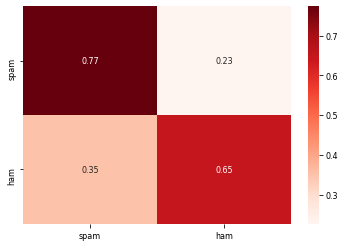

In [188]:
# Parameters of the best model obtained when training the model with diferent parameters
number_of_features = 25
C = 100
degree = 1

# Create a matrix for the data to train and to test with only the top number_of_features
X_train_new = X_train.loc[:, inx[:number_of_features]]
enron_X_test_new = enron_X_test.loc[:, inx[:number_of_features]]

# Create the model
clf = SVC(kernel='poly', C=C, degree=degree)
# Train the model using the training set of the original dataset
clf.fit(X_train_new, y_train)
# Predict the model for the examples from the enron dataset
y_predict = clf.predict(enron_X_test_new)

# Calculate metrics to evaluate the model
accuracy, precision, recall, f1score, roc_area, sensitivity, specificity = get_evaluation_metrics(enron_y_test, y_predict)

print("SVM")
print("{:^7s} {:^6s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("Degree", "C", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
print("{:^7.2f} {:^6.2f} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
.format(degree, i, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))

conf_matrix(enron_y_test, y_predict)

## 4.5. Random Forest

In [175]:
# Parameters of the best model obtained when training the model with diferent parameters
number_of_estimators = [100, 150, 250, 500, 1000, 2000]

num_features = [10,15,20,25,30,35,40,45, 55]

for n_feat in num_features:
    X_train_new = X_train.loc[:, inx[:n_feat]]
    enron_X_test_new = enron_X_test.loc[:, inx[:n_feat]]
    
    print("\nNumber of features: ", n_feat)
    print("{:^12s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("nEstimators", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
    for number in number_of_estimators:
        clf = RandomForestClassifier(n_estimators = number, random_state = 1) 
        clf.fit(X_train_new, y_train)

        y_predict = clf.predict(enron_X_test_new)
        
        accuracy, precision, recall, f1score, roc_area, sensitivity, specificity = get_evaluation_metrics(enron_y_test, y_predict)

        print("{:^12d} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
                    .format(number, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))
        


Number of features:  10
nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
    100        56.20      0.92       0.66        0.56       0.66        0.40          0.92     
    150        57.07      0.92       0.67        0.57       0.67        0.41          0.92     
    250        57.67      0.91       0.67        0.58       0.67        0.43          0.90     
    500        57.80      0.91       0.67        0.58       0.67        0.43          0.90     
    1000       58.07      0.91       0.67        0.58       0.67        0.43          0.91     
    2000       57.60      0.92       0.67        0.58       0.67        0.42          0.91     

Number of features:  15
nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
    100        58.73      0.93       0.68        0.59       0.68        0.43          0.93     
    150        58.33      0.92       0.68        0.58       0.68        0.43          

Random Forest
nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
    1000       51.33      0.93       0.63        0.51       0.63        0.31          0.95     


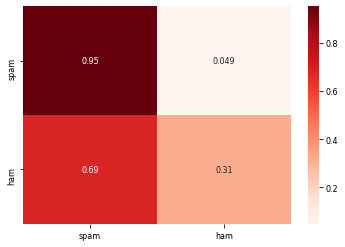

In [189]:
# Parameters of the best model obtained when training the model with diferent parameters
number_of_features = 35
n_estimators = 1000

# Create a matrix for the data to train and to test with only the top number_of_features
X_train_new = X_train.loc[:, inx[:number_of_features]]
enron_X_test_new = enron_X_test.loc[:, inx[:number_of_features]]

# Create the model
clf = RandomForestClassifier(n_estimators = n_estimators, random_state = 1) 
# Train the model using the training set of the original dataset
clf.fit(X_train_new, y_train)
# Predict the model for the examples from the enron dataset
y_predict = clf.predict(enron_X_test_new)

# Calculate metrics to evaluate the model
accuracy, precision, recall, f1score, roc_area, sensitivity, specificity = get_evaluation_metrics(enron_y_test, y_predict)

print("Random Forest")
print("{:^12s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("nEstimators", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
print("{:^12d} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
    .format(n_estimators, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))
        
conf_matrix(enron_y_test, y_predict)

## 4.6. Logistic Regression

In [176]:
# Parameters of the best model obtained when training the model with diferent parameters
C_rgl = [0.01, 1, 10, 100, 1000]

num_features = [10,15,20,25,30,40,55]

for n_feat in num_features:
    X_train_new = X_train.loc[:, inx[:n_feat]]
    enron_X_test_new = enron_X_test.loc[:, inx[:n_feat]]
    
    print("\nNumber of features: ", n_feat)
    print("{:^10s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("C", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
    for c in C_rgl:
        clf = LogisticRegression(C=c, max_iter=1000)
        clf.fit(X_train_new, y_train)
        y_predict = clf.predict(enron_X_test_new)
        
        accuracy, precision, recall, f1score, roc_area, sensitivity, specificity = get_evaluation_metrics(enron_y_test, y_predict)

        print("{:^10.2f} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
            .format(c, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))



Number of features:  10
    C      Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
   0.01      62.53      0.85       0.67        0.62       0.67        0.55          0.79     
   1.00      65.20      0.86       0.69        0.64       0.69        0.59          0.78     
  10.00      65.27      0.86       0.69        0.64       0.69        0.59          0.78     
  100.00     65.33      0.86       0.69        0.64       0.69        0.60          0.78     
 1000.00     65.33      0.86       0.69        0.64       0.69        0.60          0.78     

Number of features:  15
    C      Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
   0.01      66.07      0.87       0.70        0.65       0.70        0.60          0.80     
   1.00      67.80      0.87       0.71        0.67       0.71        0.62          0.80     
  10.00      68.07      0.87       0.71        0.67       0.71        0.63          0.80     
  100.00  

Logistic Regression
    C      Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
  100.00     68.73      0.85       0.70        0.67       0.70        0.66          0.74     


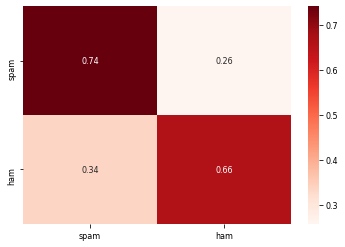

In [190]:
# Parameters of the best model obtained when training the model with diferent parameters
number_of_features = 30
C = 100

# Create a matrix for the data to train and to test with only the top number_of_features
X_train_new = X_train.loc[:, inx[:number_of_features]]
enron_X_test_new = enron_X_test.loc[:, inx[:number_of_features]]

# Create the model
clf = LogisticRegression(C=C, max_iter=1000)
# Train the model using the training set of the original dataset
clf.fit(X_train_new, y_train)
# Predict the model for the examples from the enron dataset
y_predict = clf.predict(enron_X_test_new)

# Calculate metrics to evaluate the model
accuracy, precision, recall, f1score, roc_area, sensitivity, specificity = get_evaluation_metrics(enron_y_test, y_predict)

print("Logistic Regression")
print("{:^10s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("C", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
print("{:^10.2f} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
    .format(C, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))

conf_matrix(enron_y_test, y_predict)